In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline


In [32]:
df_temp=pd.read_csv("/Users/sowmyamoka/Satish_Python/Statistics_Projects/statistics _project 1/data/Human_data.csv")

In [33]:
df_temp.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [34]:
df_temp.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


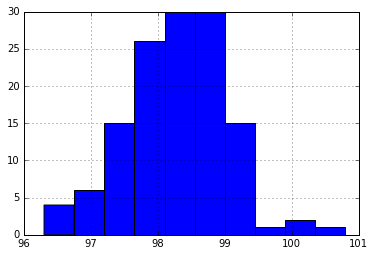

In [35]:
df_temp.temperature.hist()

In [36]:
st.mstats.normaltest(df_temp.temperature, axis=0)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

**1. IS THIS A NORMAL DISTRIBUTION?**

** SINCE P>0.05, THIS DISTRIBUTION IS NORMAL**


In [37]:
df_temp.isnull().sum(axis=0)

temperature    0
gender         0
heart_rate     0
dtype: int64

**There are no Null values**

In [38]:
def CI_mean_dist_sample(x,percentile):
    p=st.norm.ppf((1+0.01*percentile)/2)
    std_mean=x.std()/np.sqrt(x.count())
    print(x.mean()-p*std_mean)
    print(x.mean()+p*std_mean)
    return 

In [39]:
CI_mean_dist_sample(df_temp.temperature,95) # 95% confidence interval for temperature mean.

98.1231964282
98.3752651103


In [40]:
def P_value_mean_dist_sample(x,num):# x is the sample, num is the value for which we need p
    std_mean=x.std()/np.sqrt(x.count())
    mean=x.mean()
    z=(num-mean)/std_mean
    P=1-st.norm.cdf(z)
    print(P)
    return 

In [41]:
P_value_mean_dist_sample(df_temp.temperature,98.6) # probability of mean temperature to be as 
                                                    #great or greater than 98.6

2.45107850683e-08


In [42]:
P_value_mean_dist_sample(df_temp.temperature,98.2) # probability of mean temperature to be as 
                                                    #great or greater than 98.2

0.778039623806


**2. IS THE TEMPERATURE MEAN 98.2 OR 98.6?**

** SINCE P>0.05 FOR 98.2, THE MEAN TEMP IS 98.2**

In [43]:
Temp_pop_std=df_temp.temperature.std()

In [44]:
Temp_pop_std

0.7331831580389454

In [45]:
def CI_mean_dist_pop(x,std,percentile):
    p=st.norm.ppf((1+0.01*percentile)/2)
    print(x-p*std)
    print(x+p*std)
    return

In [46]:
CI_mean_dist_pop(98.2,0.733,95)

96.7633463993
99.6366536007


**3. WHAT IS CONSIDERED ABNORMAL TEMPERATURE?**

** WITH MEAN OF 98.2, THE 95% CI HUMAN TEMPERATURE IS (96.76,99.63)**

** ANY TEMPERATURE OUTSIDE THIS IS ABNORMAL**

In [47]:
df_temp.groupby('gender').describe()

heart_rate  temperature
gender                               
F      count   65.000000    65.000000
       mean    74.153846    98.393846
       std      8.105227     0.743488
       min     57.000000    96.400000
       25%     68.000000    98.000000
       50%     76.000000    98.400000
       75%     80.000000    98.800000
       max     89.000000   100.800000
M      count   65.000000    65.000000
       mean    73.369231    98.104615
       std      5.875184     0.698756
       min     58.000000    96.300000
       25%     70.000000    97.600000
       50%     73.000000    98.100000
       75%     78.000000    98.600000
       max     86.000000    99.500000

In [48]:
def CI_mean_diff(x,y,percentile):
    p=st.norm.ppf((1+0.01*percentile)/2)
    x.mean()
    y.mean()
    x_mean_std=x.std()/np.sqrt(x.count())
    y_mean_std=y.std()/np.sqrt(y.count())
    diff_mean_std=np.sqrt((np.square(x_mean_std))+(np.square(y_mean_std)))
    print((x.mean())-(y.mean())-p*(diff_mean_std))
    print((x.mean())-(y.mean())+p*(diff_mean_std))
    return 

In [49]:
CI_mean_diff(df_temp[df_temp.gender=='M'].temperature,df_temp[df_temp.gender=='F'].temperature,95)

-0.537271954155
-0.0411895843066


** 3.DOES MALES AND FEMALES HAVE DIFFERENT MEAN TEMPERATURE?**

** FROM THE CI ABOVE, MEAN DIFFERENCE 0 IS NOT FALLING IN THE 95% CONFIDENCE INTERVAL, SO THERE IS A DIFFERENCE**

** UNDER THE NULL HYPOTHESIS MEAN DIFFERENCE IS ZERO, THE P VALUE OF CURRENT SAMPLE IS LESS THAN 0.05, SO THERE IS A DIFFERENCE **

In [61]:
def P_value_no_diff(x,y): # probability of no difference between samples
    x.mean()
    y.mean()
    x_mean_std=x.std()/np.sqrt(x.count())
    y_mean_std=y.std()/np.sqrt(y.count())
    diff_mean_std=np.sqrt((np.square(x_mean_std))+(np.square(y_mean_std)))
    diff_mean=np.abs(x.mean()-y.mean())
    z=diff_mean/diff_mean_std
    P=1-st.norm.cdf(z)
    print(P)
    return 

** MALES HAVE LESS TEMPERAUTRE THAN FEMALES**

In [62]:
P_value_no_diff(df_temp[df_temp.gender=='M'].temperature,df_temp[df_temp.gender=='F'].temperature)

0.0111436803803
